**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

**Lectures:** [365datascience](https://learn.365datascience.com/courses/preview/machine-learning-in-python/)

# **Linear Regression Algorithm**
[Linear Regression](https://www.ibm.com/topics/linear-regression) is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

#### **Task:**  
relation between student SAT and GPA


### **Dataset available on:** [Kaggle ](https://www.kaggle.com/datasets/farhansadeek/sat-to-gpa)

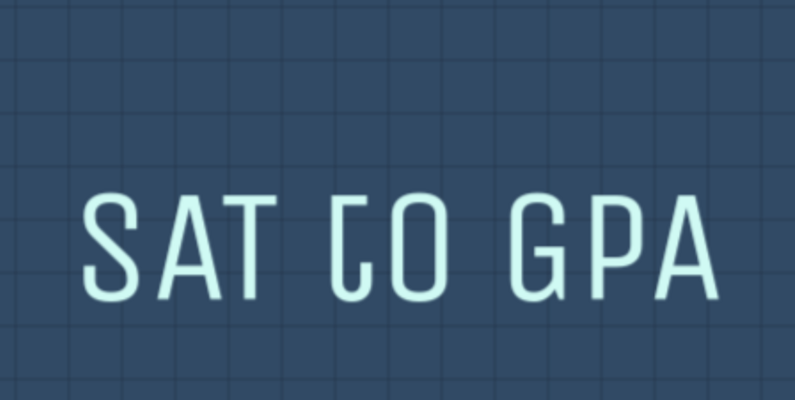

### **Imports**

In [1]:
import numpy as np # scientific computing for multidimensional array
import pandas as pd # wrangling and enchancing numpy
import scipy # scientific python
import statsmodels.api as sm # statistical analysis
import matplotlib.pyplot as plt # visualization
import seaborn as sns # advanced statistical visuaization
sns.set() # over write the graphics of all the matplotlib plot
import sklearn # machine learn
%matplotlib inline

#### **Read the csv file and study the database**

In [2]:
# read the data using pandas
satGPA_df = pd.read_csv('/content/SAT_GPA.csv')

#### **Basic EDA**

In [3]:
# display the first five rows using the head function
satGPA_df.head(5)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
# shape of the data
satGPA_df.shape

(84, 2)

In [5]:
# check for missing values
satGPA_df.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [6]:
# check data types
satGPA_df.dtypes

SAT      int64
GPA    float64
dtype: object

In [7]:
# describe stats with .describe() method
satGPA_df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


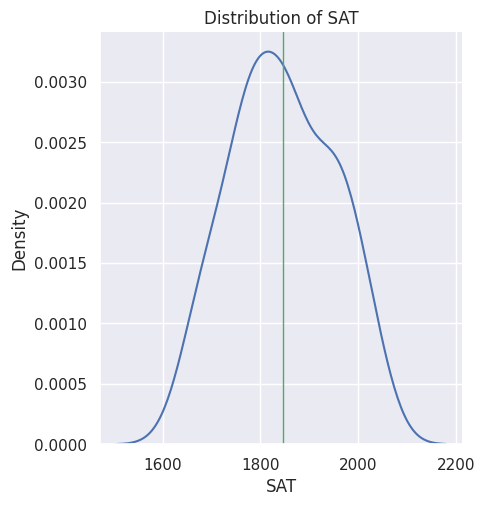

In [8]:
# plot the distribution
sns.set_theme()
sns.displot(satGPA_df['SAT'], kind="kde").set(title="Distribution of SAT")
plt.axvline(x=satGPA_df['SAT'].mean(), linewidth=1, color='g');

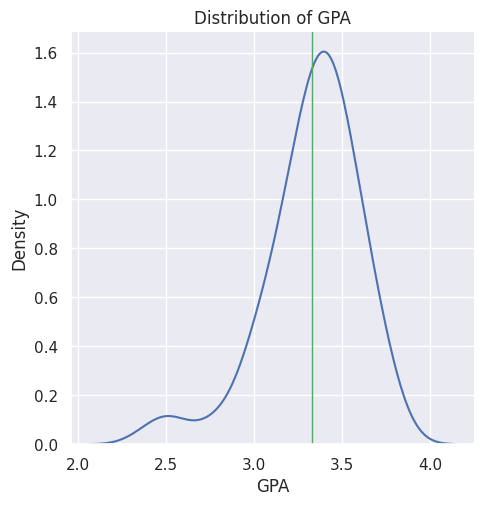

In [9]:
# plot the distribution
sns.displot(satGPA_df['GPA'], kind="kde").set(title="Distribution of GPA")
plt.axvline(x=satGPA_df['GPA'].mean(), linewidth=1, color='g');

### **Regression model:**

#### **Define the target and the inputs**

In [10]:
input = satGPA_df['SAT'] # input
target = satGPA_df['GPA'] # target

#### **plot the regression line using seaborn kind="reg" data:**

GPA vs SAT


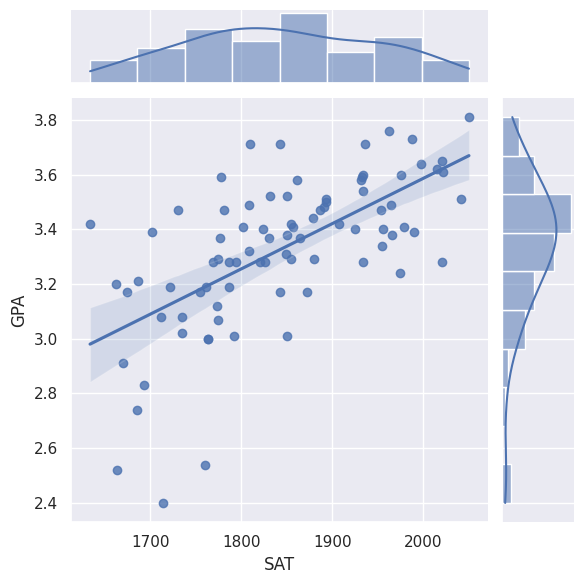

In [11]:
print("GPA vs SAT")
sns.jointplot(data=satGPA_df, x='SAT', y="GPA",kind='reg');

**model:**

In [12]:
x = sm.add_constant(input) # statsmodels add a constant or the intercept value
results = sm.OLS(target,x).fit() # fit ordinary least square method x and y/target

In [13]:
# display a summary result of the model using the .summary method
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           7.20e-11
Time:                        08:38:49   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

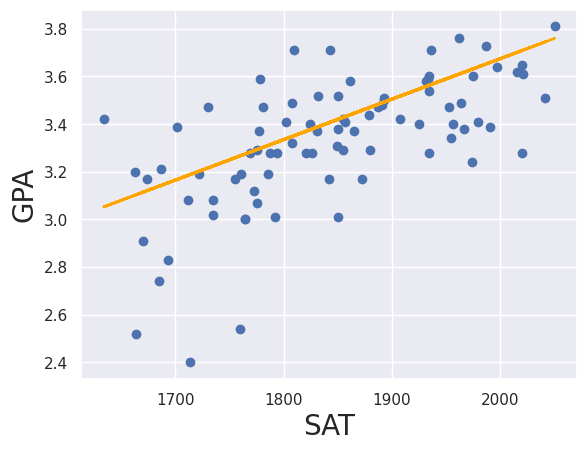

In [14]:
plt.scatter(input, target) # plot the scatter
yhat = 0.0017*input + 0.2750 # add the predicted equation
fig = plt.plot(input, yhat, lw=2, c='orange', label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### **Interpretation**
**regression equation: GPA = 0.275 + 0.0017*SAT**

**Coefficients (coef):** The intercept is 0.2750 and the slope is 0.0017.

**standard error (std err):** The lower the standard error the better the estimate.

**p-value:** a p-value lower than 0.05 means that the variable is significant, <br>                therefore the coefficient is most probably different from zero.

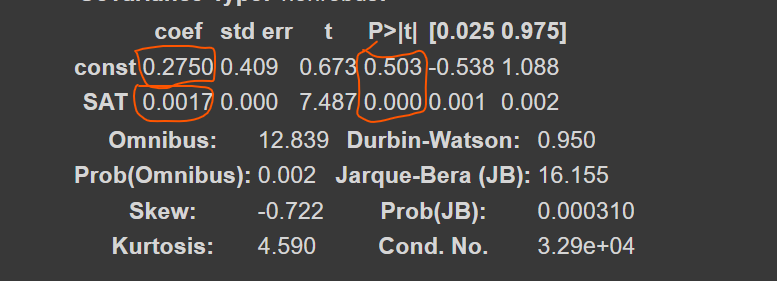

### **R-squared and Adj. R-squared:**
[
**R-squared:** ](https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model.


[**Adj. R-squared:**](https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp) Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared.


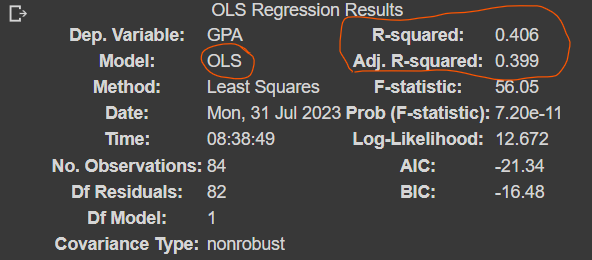

## **Now over to you use the code above to find cause and effect on a dataset you like Good Luck!!**